In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

the kmeans algorithm stopped after 3 iterations
tolerance: 0.0001


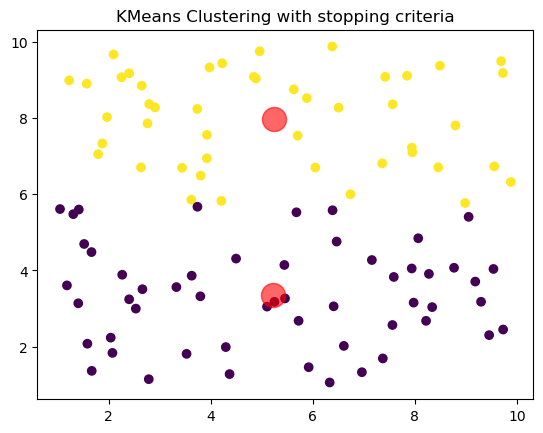

In [2]:
#kmeans
np.random.seed(42)
data_dict={
    'feature1':np.random.uniform(1,10,100),
    'feature2':np.random.uniform(1,10,100)
}

x=np.array(list(zip(data_dict['feature1'],data_dict['feature2'])))

kmeans=KMeans(n_clusters=2,max_iter=300,tol=0.0001,random_state=50)
kmeans.fit(x)

centers=kmeans.cluster_centers_
labels=kmeans.labels_

print(f"the kmeans algorithm stopped after {kmeans.n_iter_} iterations")
print("tolerance:",kmeans.tol)

plt.scatter(x[:,0],x[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='red',s=300,alpha=0.6)
plt.title('KMeans Clustering with stopping criteria')
plt.show()

In [3]:
#heirachical
np.random.seed(42)
data_dict={
    'feature1':np.random.uniform(1,10,5),
    'feature2':np.random.uniform(1,10,5)
}

x=np.array(list(zip(data_dict['feature1'],data_dict['feature2'])))
x

array([[4.37086107, 2.40395068],
       [9.55642876, 1.52275251],
       [7.58794548, 8.79558531],
       [6.38792636, 6.41003511],
       [2.40416776, 7.3726532 ]])

[[2.         3.         2.6703737  2.        ]
 [4.         5.         4.0984102  3.        ]
 [0.         6.         4.48522739 4.        ]
 [1.         7.         5.25990708 5.        ]]


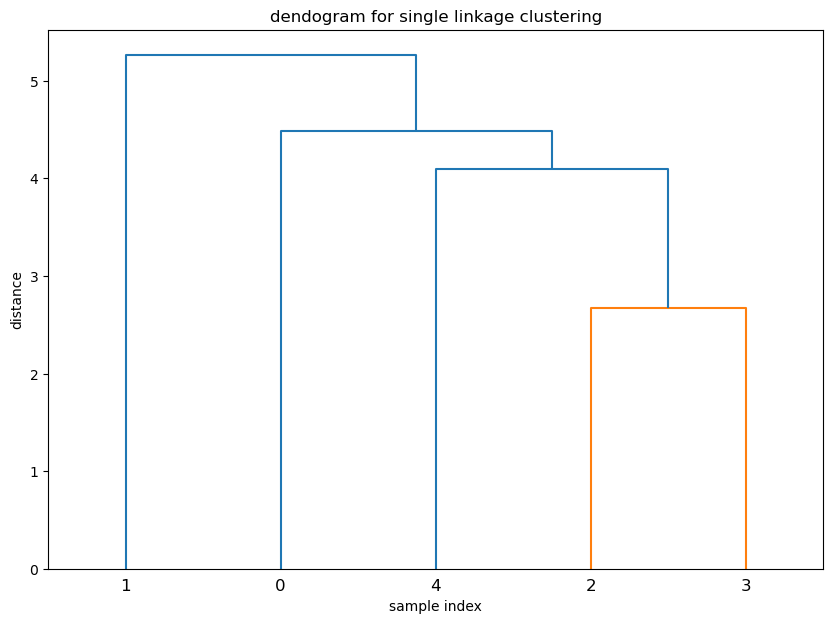

In [4]:
linked_eculidean=linkage(x,method='single',metric='euclidean')
print(linked_eculidean)

plt.figure(figsize=(10,7))
dendrogram(linked_eculidean,orientation='top',labels=np.arange(0,5),distance_sort='ascending',show_leaf_counts=True)
plt.title('dendogram for single linkage clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

[[2.         3.         2.6703737  2.        ]
 [0.         1.         5.25990708 2.        ]
 [4.         5.         5.37552669 3.        ]
 [6.         7.         9.23992291 5.        ]]


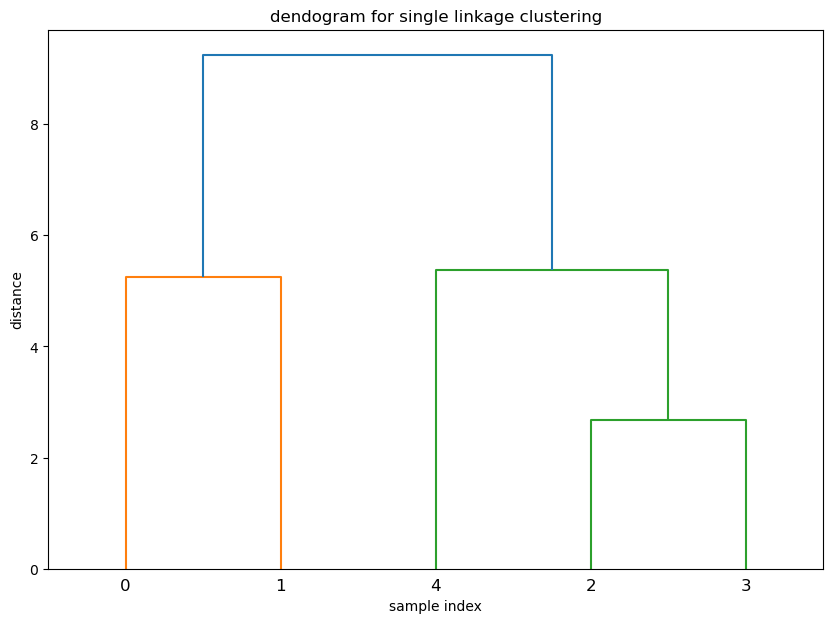

In [5]:
linked_eculidean=linkage(x,method='complete',metric='euclidean')
print(linked_eculidean)

plt.figure(figsize=(10,7))
dendrogram(linked_eculidean,orientation='top',labels=np.arange(0,5),distance_sort='ascending',show_leaf_counts=True)
plt.title('dendogram for single linkage clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

[[2.         3.         2.6703737  2.        ]
 [4.         5.         4.73696844 3.        ]
 [0.         1.         5.25990708 2.        ]
 [6.         7.         6.59725936 5.        ]]


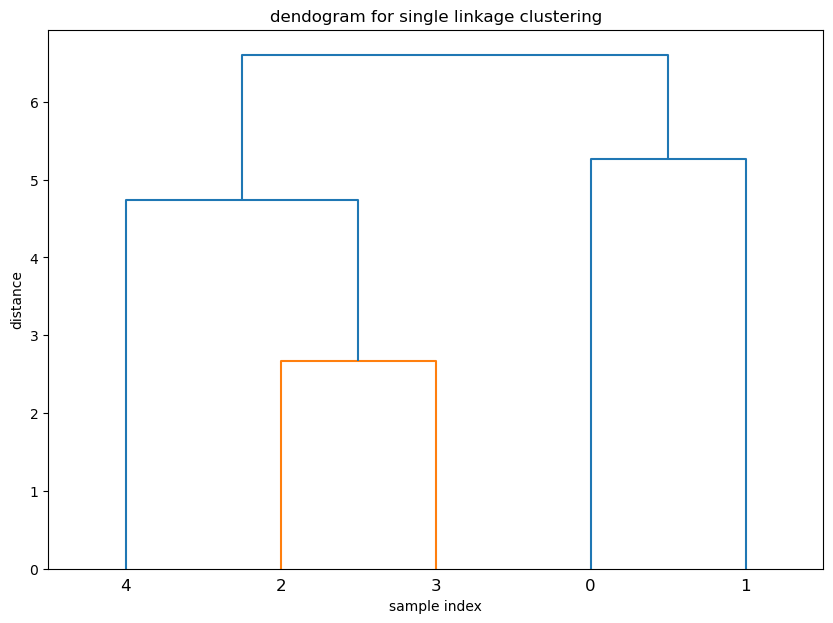

In [6]:
linked_eculidean=linkage(x,method='average',metric='euclidean')
print(linked_eculidean)

plt.figure(figsize=(10,7))
dendrogram(linked_eculidean,orientation='top',labels=np.arange(0,5),distance_sort='ascending',show_leaf_counts=True)
plt.title('dendogram for single linkage clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

[[2.         3.         2.6703737  2.        ]
 [4.         5.         4.58954276 3.        ]
 [0.         6.         5.23665694 4.        ]
 [1.         7.         6.43354059 5.        ]]


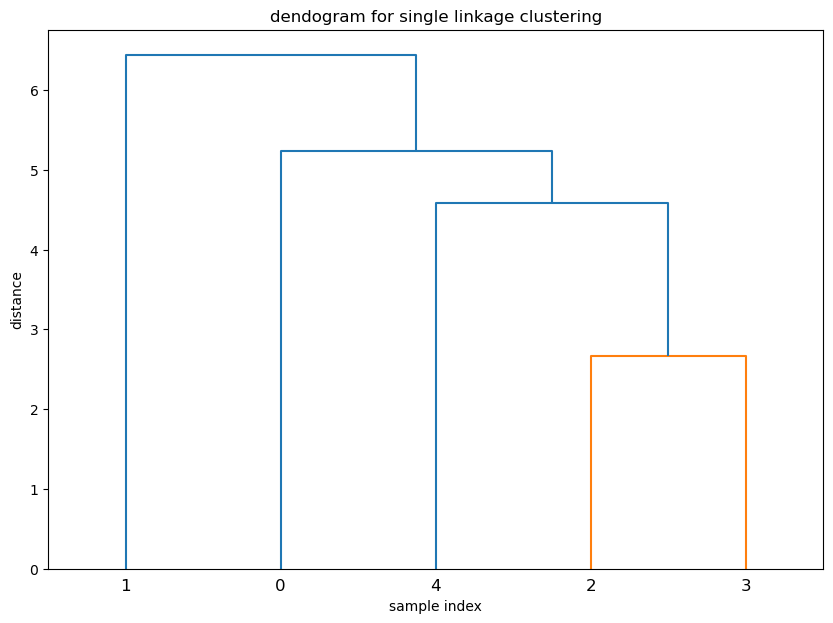

In [7]:
linked_eculidean=linkage(x,method='centroid',metric='euclidean')
print(linked_eculidean)

plt.figure(figsize=(10,7))
dendrogram(linked_eculidean,orientation='top',labels=np.arange(0,5),distance_sort='ascending',show_leaf_counts=True)
plt.title('dendogram for single linkage clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

[[ 6.82988224e-01 -3.45203344e-01]
 [ 2.04099043e+00 -1.31614674e-01]
 [-1.39751545e-01  4.54390502e-01]
 [ 8.85747852e-01  2.86341827e-01]
 [ 1.18245853e+00 -4.97710508e-01]
 [ 1.01920826e+00 -4.25465834e-01]
 [ 3.89361586e-01 -2.47117226e-01]
 [-5.60384576e-01  7.12681100e-01]
 [ 9.01843523e-01  5.39308727e-02]
 [ 2.06747907e-01  6.20769309e-03]
 [ 1.32352331e+00 -2.89175832e-01]
 [ 3.83758712e-01  8.51802379e-01]
 [ 9.69121626e-01 -4.85487343e-01]
 [ 6.69900924e-01  9.19338590e-01]
 [ 1.23207593e-01  1.35338991e-02]
 [ 1.01678336e+00 -5.57668763e-01]
 [ 2.00829930e+00  3.16434346e-01]
 [ 7.21580319e-01 -3.72571143e-01]
 [-8.56042097e-01  2.18135896e-02]
 [ 1.82685277e-01  2.87798699e-01]
 [-5.04992232e-02  1.01489642e+00]
 [-8.40751844e-01  5.38150274e-01]
 [ 1.51040341e+00 -4.55110964e-01]
 [ 1.50815974e+00 -4.12378184e-01]
 [-7.61505859e-01  8.48449189e-01]
 [ 5.91410876e-01  7.82282802e-01]
 [ 1.83953008e+00  9.60424371e-02]
 [ 2.15248367e+00  4.28616988e-01]
 [ 6.58295179e-02  2

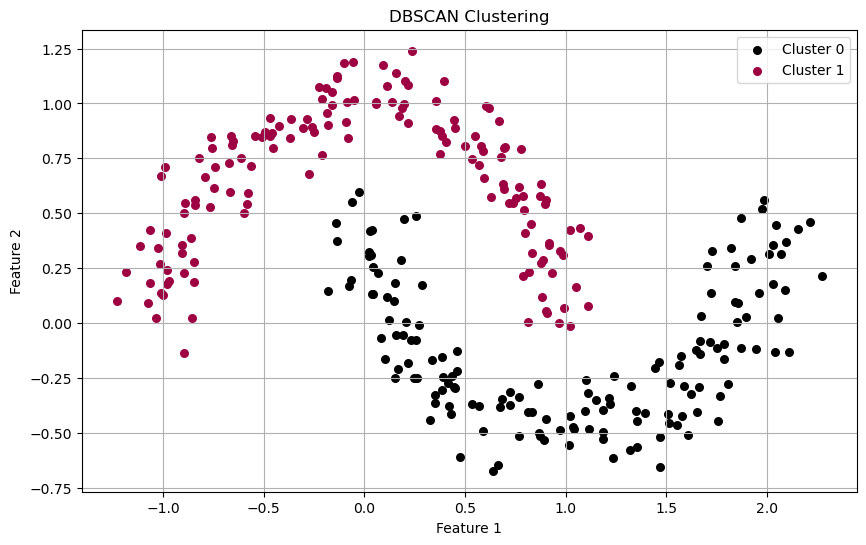

In [21]:
#dbscan

x,_=make_moons(n_samples=300,noise=0.1,random_state=42)
print(x,type(x))
dbscan=DBSCAN(eps=0.2,min_samples=5)
labels=dbscan.fit_predict(x)

colors=['k']+[plt.cm.Spectral(i/10) for i in range(len(set(labels))-1)]
print(labels,colors)
plt.figure(figsize=(10,6))
unique_labels=set(labels)

for k in unique_labels:
    plt.scatter(x[labels==k][:,0],x[labels==k][:,1],color=colors[k],label=f'Cluster {k}',s=30)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

[[ 6.82988224e-01 -3.45203344e-01]
 [ 2.04099043e+00 -1.31614674e-01]
 [-1.39751545e-01  4.54390502e-01]
 [ 8.85747852e-01  2.86341827e-01]
 [ 1.18245853e+00 -4.97710508e-01]
 [ 1.01920826e+00 -4.25465834e-01]
 [ 3.89361586e-01 -2.47117226e-01]
 [-5.60384576e-01  7.12681100e-01]
 [ 9.01843523e-01  5.39308727e-02]
 [ 2.06747907e-01  6.20769309e-03]
 [ 1.32352331e+00 -2.89175832e-01]
 [ 3.83758712e-01  8.51802379e-01]
 [ 9.69121626e-01 -4.85487343e-01]
 [ 6.69900924e-01  9.19338590e-01]
 [ 1.23207593e-01  1.35338991e-02]
 [ 1.01678336e+00 -5.57668763e-01]
 [ 2.00829930e+00  3.16434346e-01]
 [ 7.21580319e-01 -3.72571143e-01]
 [-8.56042097e-01  2.18135896e-02]
 [ 1.82685277e-01  2.87798699e-01]
 [-5.04992232e-02  1.01489642e+00]
 [-8.40751844e-01  5.38150274e-01]
 [ 1.51040341e+00 -4.55110964e-01]
 [ 1.50815974e+00 -4.12378184e-01]
 [-7.61505859e-01  8.48449189e-01]
 [ 5.91410876e-01  7.82282802e-01]
 [ 1.83953008e+00  9.60424371e-02]
 [ 2.15248367e+00  4.28616988e-01]
 [ 6.58295179e-02  2

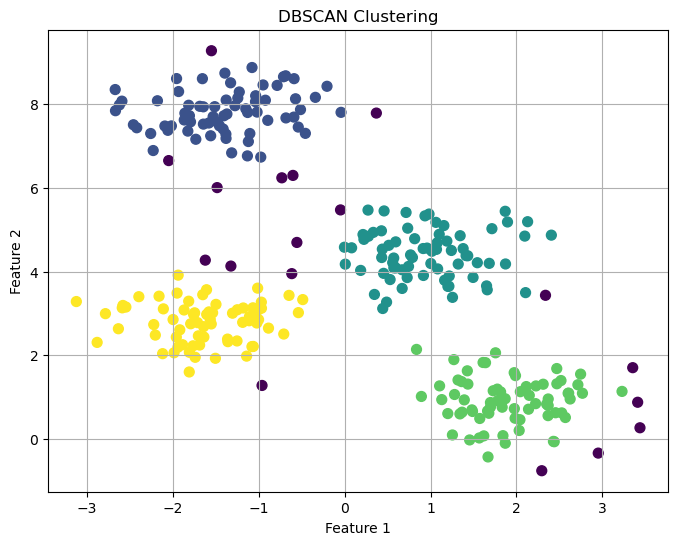

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
print(x)
# Fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
